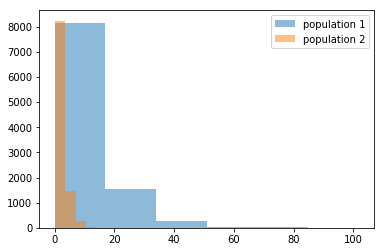

In [59]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

# Central Limit Theorem: When sampling from a population, as the sample size gets larger the sample means approach
# a normal distribution around the true population mean.

#x1 = 0
#x2 = 0
#sd1 = 0
#sd2 = 1
#n1 = 1
#n2 = 1
#
#y = x2 - x1
#
#standard_error = (((sd1**2)/n1)+((sd2**2)/n2))
#
#t_value = y/standard_error

# Given a t-value, we can calculate the probability that a t-value at least this extreme would occur from chance,
# called a p-value. The lower the p-value, the more confidently we can conclude that there is a meaningful
# difference between the means.

pop1 = np.random.exponential(10,10000)
pop2 = np.random.exponential(2,10000)

plt.hist(pop1, alpha=0.5, bins=6, label='population 1')
plt.hist(pop2, alpha=0.5, bins=6, label='population 2')
plt.legend(loc='upper right')
plt.show()

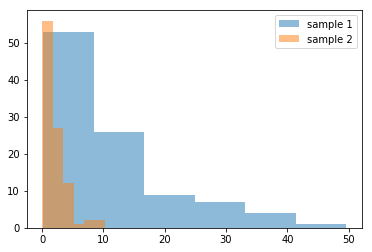

In [60]:
sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

plt.hist(sample1, alpha=0.5, bins=6, label='sample 1')
plt.hist(sample2, alpha=0.5, bins=6, label='sample 2')
plt.legend(loc='upper right')
plt.show()

In [61]:
print('sample 1 mean:\t\t\t' + str(sample1.mean()))
print('sample 2 mean:\t\t\t' + str(sample2.mean()))
print('sample 1 standard deviation:\t' + str(sample1.std()))
print('sample 2 standard deviation:\t' + str(sample2.std()))

diff=sample2.mean() - sample1.mean()
print('Difference of sample means:\t' + str(diff))

sample 1 mean:			11.019073455489712
sample 2 mean:			1.9548509311707858
sample 1 standard deviation:	10.352673631712833
sample 2 standard deviation:	1.9500011330146814
Difference of sample means:	-9.064222524318927


In [62]:
size = np.array([len(sample1), len(sample2)])
sd = np.array([sample1.std(), sample2.std()])
from scipy.stats import ttest_ind

diff_se = (sum(sd ** 2 / size)) ** 0.5

print(diff/diff_se)
print(ttest_ind(sample2, sample1, equal_var=False))

-8.604140678043976
Ttest_indResult(statistic=-8.56101188175179, pvalue=9.529817166890945e-14)


In [63]:
# *** ASSIGNMENT ***
# 1. When I increased the sample sizes to 1000, the t-value tripled to about 48, and the p-value got so small the
# computer called it 0. When I reduced the sample sizes to 20, the t-value became about 6, and the p-value
# has 7 zeroes after the decimal as opposed to 35 zeroes for a sample size of 100. Even with a small sample
# size of 20, we are extremely confident that these two samples were from different populations. The sample means and
# standard deviations did not change significantly with the change in sample size
#
# 2. I changed the probability value for pop1 to 0.3, and it significantly affected the t-value and p-value.
# The p-value only had 16 zeroes (is there a better technical way to say this) as opposed to the 35 zeroes from
# from before. This is a signficant difference in confidence, although we are still very confident that
# these samples are from different populations. When I changed it to 0.4 there were only 8 zeroes.
#
# 3. I tried an exponential distribution. It ended up swapping the size of the populations (as in sample 1 was now
# bigger than sample 2) which ended up giving us a negative t-value...Is that OK mathematically speaking?